# COMSOL Study Analysis: Parameter sweeps


## Particle positions at surface of target


- current chamber
- microwave extraction aperture (1 mm diameter)
- surface mesh
- 5000 particles

- COMSOL files 07.sweep. See notion card for the details of sweeps
- FWHM and plots are in /Users/hkromer/02_PhD/02_Data/01_COMSOL/01_IonOptics/02.current_chamber/07.sweep/particleData/plots/2D_histograms_lastTimestep/


- last accessed: 2019-02-12





### Import statements

In [2]:
import pandas as pd
import numpy as np
import os
import sys
import re
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import kde
from scipy import optimize
from matplotlib.ticker import NullFormatter
from matplotlib import pyplot, transforms

pd.set_option("display.max_columns", 300)

### Specify path to datafile

In [49]:
file_path = '/Users/hkromer/02_PhD/02_Data/01_COMSOL/01_IonOptics/02.current_chamber/07.sweep/particleData/plots/2D_histograms_lastTimestep/df_FWHMs.csv'

fig_save_path = '/Users/hkromer/02_PhD/02_Data/01_COMSOL/01_IonOptics/02.current_chamber/07.sweep/particleData/plots/2D_histograms_lastTimestep/sweep_analysis/'

In [50]:
df = pd.read_csv(file_path)

def extract_ID(row):
    ID = re.findall(r'\.(\d\d\d)\.particleData', row)[0]
    return ID

df['ID'] = df['id'].apply(lambda x: extract_ID(x))
df['filename'] = df['id']
df = df.drop('id', axis='columns').set_index('ID')


print(df.head())

       FWHM_y    FWHM_x      FWHM  hat_x_width  hat_y_width  \
ID                                                            
001  2.460711  2.042375  2.251543     2.150993     2.121303   
001  1.606303  1.319134  1.462718     1.420075     2.000000   
001  1.952440  1.613644  1.783042     1.745072     2.000000   
002  1.049686  0.840581  0.945134     2.000000     1.995816   
002  1.346404 -1.097006  1.221705     1.065264     1.999999   

                               runfile run_type sweep_variable  \
ID                                                               
001  07.sweep.001.particleData.txt.csv       TD       V_HV=-60   
001  07.sweep.001.particleData.txt.csv       TD      V_HV=-100   
001  07.sweep.001.particleData.txt.csv       TD       V_HV=-80   
002  07.sweep.002.particleData.txt.csv       TD      V_HV=-150   
002  07.sweep.002.particleData.txt.csv       TD      V_HV=-120   

                              filename  
ID                                      
001  07.sweep

## Processing the sweeps separately

### 001 & 002: Target high voltage

Also give the sweep info what the parameter is (x value for the plots)

In [68]:
ID_process = ['001', '002']
sweep_info = 'High voltage [kV]'
y_label = 'FWHM [mm]'
fig_title = 'FWHM versus target high voltage'

### Extract FWHM and make plot for these IDs

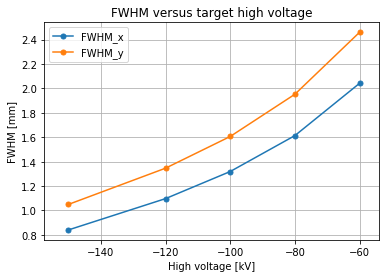

       FWHM_y    FWHM_x      FWHM  hat_x_width  hat_y_width  \
ID                                                            
001  2.460711  2.042375  2.251543     2.150993     2.121303   
001  1.952440  1.613644  1.783042     1.745072     2.000000   
001  1.606303  1.319134  1.462718     1.420075     2.000000   
002  1.346404  1.097006  1.221705     1.065264     1.999999   
002  1.049686  0.840581  0.945134     2.000000     1.995816   

                               runfile run_type sweep_variable  \
ID                                                               
001  07.sweep.001.particleData.txt.csv       TD       V_HV=-60   
001  07.sweep.001.particleData.txt.csv       TD       V_HV=-80   
001  07.sweep.001.particleData.txt.csv       TD      V_HV=-100   
002  07.sweep.002.particleData.txt.csv       TD      V_HV=-120   
002  07.sweep.002.particleData.txt.csv       TD      V_HV=-150   

                              filename  sweep_val sweep_short  
ID                             

In [69]:
df_data = df.loc[ID_process, :]

# convert FWHMs to absolute values
df_data['FWHM_y'] = np.abs(df_data['FWHM_y'])
df_data['FWHM_x'] = np.abs(df_data['FWHM_x'])

def extract_sweep_val(row):
    sweep_val = re.findall(r'=(.*)$', row)[0]
    return sweep_val

def extract_sweep_short(row):
    s = re.findall(r'(.*)=', row)[0]
    return s

df_data['sweep_val'] = df_data['sweep_variable'].apply(lambda x: extract_sweep_val(x)).astype(float)
df_data['sweep_short'] = df_data['sweep_variable'].apply(lambda x: extract_sweep_short(x))
df_data = df_data.sort_values(by='sweep_val', ascending=False)

_ = df_data.plot(kind='line', style='.-', x='sweep_val', y=['FWHM_x', 'FWHM_y'], ms=10)
_ = plt.xlim(np.min(df_data['sweep_val'])*1.05, np.max(df_data['sweep_val'])*0.9)
_ = plt.grid()
_ = plt.xlabel(sweep_info)
_ = plt.ylabel(y_label)
_ = plt.title(fig_title)


# save figure
directory = f'{fig_save_path}/'
if not os.path.exists(directory):
    os.makedirs(directory)

filename =  f'{fig_save_path}/{ID_process[0]}.{df_data.sweep_short.unique()[0]}'

plt.savefig(filename + '.png', dpi=600)
plt.show()
print(df_data)


## 003 & 004: Distance extr electrode back to front of ion source

Also give the sweep info what the parameter is (x value for the plots)

In [70]:
ID_process = ['003', '004']
sweep_info = 'Distance back of electrode to front of ion source [mm]'
y_label = 'FWHM [mm]'
fig_title = 'FWHM versus distance extraction electrode'

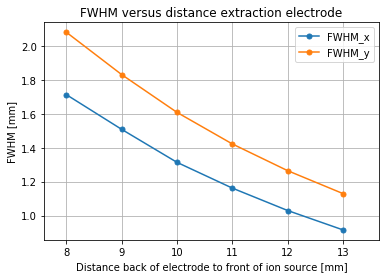

       FWHM_y    FWHM_x      FWHM  hat_x_width  hat_y_width  \
ID                                                            
004  1.129293  0.915245  1.022269     0.924039     1.999999   
004  1.264301  1.029461  1.146881     1.090463     2.000276   
004  1.421878  1.161582  1.291730     1.254325     2.000000   
003  1.607993  1.313439  1.460716     1.305500     2.000000   
003  1.830787  1.508010  1.669398     1.585371     2.000031   
003  2.080365  1.712578  1.896472     1.989868     2.000051   

                               runfile run_type  sweep_variable  \
ID                                                                
004  07.sweep.004.particleData.txt.csv       TD  Extr.offset=13   
004  07.sweep.004.particleData.txt.csv       TD  Extr.offset=12   
004  07.sweep.004.particleData.txt.csv       TD  Extr.offset=11   
003  07.sweep.003.particleData.txt.csv       TD  Extr.offset=10   
003  07.sweep.003.particleData.txt.csv       TD   Extr.offset=9   
003  07.sweep.003.particle

In [71]:
df_data = df.loc[ID_process, :]

# convert FWHMs to absolute values
df_data['FWHM_y'] = np.abs(df_data['FWHM_y'])
df_data['FWHM_x'] = np.abs(df_data['FWHM_x'])

def extract_sweep_val(row):
    sweep_val = re.findall(r'=(.*)$', row)[0]
    return sweep_val

def extract_sweep_short(row):
    s = re.findall(r'(.*)=', row)[0]
    return s

df_data['sweep_val'] = df_data['sweep_variable'].apply(lambda x: extract_sweep_val(x)).astype(float)
df_data['sweep_short'] = df_data['sweep_variable'].apply(lambda x: extract_sweep_short(x))
df_data = df_data.sort_values(by='sweep_val', ascending=False)

_ = df_data.plot(kind='line', style='.-', x='sweep_val', y=['FWHM_x', 'FWHM_y'], ms=10)
_ = plt.xlim(np.min(df_data['sweep_val'])*0.95, np.max(df_data['sweep_val'])*1.05)
_ = plt.grid()
_ = plt.xlabel(sweep_info)
_ = plt.ylabel(y_label)
_ = plt.title(fig_title)


# save figure
directory = f'{fig_save_path}/'
if not os.path.exists(directory):
    os.makedirs(directory)

filename =  f'{fig_save_path}/{ID_process[0]}.{df_data.sweep_short.unique()[0]}'

plt.savefig(filename + '.png', dpi=600)
plt.show()
print(df_data)


## 005 & 006: Distance between target surface and ion source aperture

Also give the sweep info what the parameter is (x value for the plots)

In [72]:
ID_process = ['005', '006']
sweep_info = 'Distance between target surface and ion source aperture [mm]'
y_label = 'FWHM [mm]'
fig_title = 'FWHM versus distance target surface'

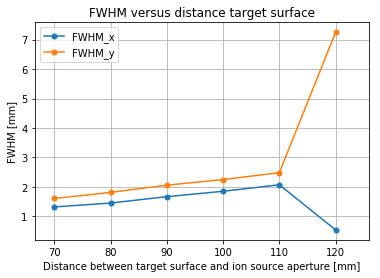

       FWHM_y    FWHM_x      FWHM  hat_x_width  hat_y_width  \
ID                                                            
006  7.250730  0.535999  3.893365     2.778354     2.513405   
006  2.479692  2.068675  2.274183     2.295297     2.409998   
006  2.246626  1.848196  2.047411     1.988669     2.070089   
005  2.055727  1.665151  1.860439     1.804630     2.005561   
005  1.810021  1.448348  1.629185     1.625121     1.999607   
005  1.603819  1.315915  1.459867     1.332952     2.000000   

                               runfile run_type       sweep_variable  \
ID                                                                     
006  07.sweep.006.particleData.txt.csv       TD  Target.L_offset=120   
006  07.sweep.006.particleData.txt.csv       TD  Target.L_offset=110   
006  07.sweep.006.particleData.txt.csv       TD  Target.L_offset=100   
005  07.sweep.005.particleData.txt.csv       TD   Target.L_offset=90   
005  07.sweep.005.particleData.txt.csv       TD   Target.L_offs

In [73]:
df_data = df.loc[ID_process, :]

# convert FWHMs to absolute values
df_data['FWHM_y'] = np.abs(df_data['FWHM_y'])
df_data['FWHM_x'] = np.abs(df_data['FWHM_x'])

def extract_sweep_val(row):
    sweep_val = re.findall(r'=(.*)$', row)[0]
    return sweep_val

def extract_sweep_short(row):
    s = re.findall(r'(.*)=', row)[0]
    return s

df_data['sweep_val'] = df_data['sweep_variable'].apply(lambda x: extract_sweep_val(x)).astype(float)
df_data['sweep_short'] = df_data['sweep_variable'].apply(lambda x: extract_sweep_short(x))
df_data = df_data.sort_values(by='sweep_val', ascending=False)

_ = df_data.plot(kind='line', style='.-', x='sweep_val', y=['FWHM_x', 'FWHM_y'], ms=10)
_ = plt.xlim(np.min(df_data['sweep_val'])*0.95, np.max(df_data['sweep_val'])*1.05)
_ = plt.grid()
_ = plt.xlabel(sweep_info)
_ = plt.ylabel(y_label)
_ = plt.title(fig_title)


# save figure
directory = f'{fig_save_path}/'
if not os.path.exists(directory):
    os.makedirs(directory)

filename =  f'{fig_save_path}/{ID_process[0]}.{df_data.sweep_short.unique()[0]}'

plt.savefig(filename + '.png', dpi=600)
plt.show()
print(df_data)


## 007 & 008: High voltage of extraction electrode 

Also give the sweep info what the parameter is (x value for the plots)

In [74]:
ID_process = ['007', '008']
sweep_info = 'High voltage of extraction electrode [kV]'
y_label = 'FWHM [mm]'
fig_title = 'FWHM versus extraction electrode voltage'

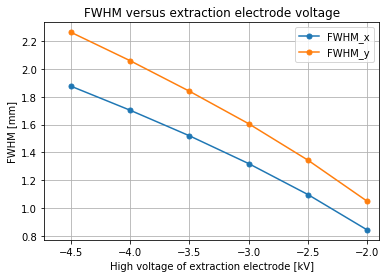

       FWHM_y    FWHM_x      FWHM  hat_x_width  hat_y_width  \
ID                                                            
007  1.048314  0.841661  0.944987     2.000000     1.995832   
007  1.344276  1.096502  1.220389     1.072634     1.999999   
007  1.606607  1.319418  1.463012     1.404328     2.000012   
008  1.840673  1.519625  1.680149     1.706082     2.000023   
008  2.060251  1.703700  1.881976     1.965838     1.999518   
008  2.265256  1.876972  2.071114     2.025801     2.000243   

                               runfile run_type     sweep_variable  \
ID                                                                   
007  07.sweep.007.particleData.txt.csv       TD    V_extraction=-2   
007  07.sweep.007.particleData.txt.csv       TD  V_extraction=-2.5   
007  07.sweep.007.particleData.txt.csv       TD    V_extraction=-3   
008  07.sweep.008.particleData.txt.csv       TD  V_extraction=-3.5   
008  07.sweep.008.particleData.txt.csv       TD    V_extraction=-4   
008  

In [75]:
df_data = df.loc[ID_process, :]

# convert FWHMs to absolute values
df_data['FWHM_y'] = np.abs(df_data['FWHM_y'])
df_data['FWHM_x'] = np.abs(df_data['FWHM_x'])

def extract_sweep_val(row):
    sweep_val = re.findall(r'=(.*)$', row)[0]
    return sweep_val

def extract_sweep_short(row):
    s = re.findall(r'(.*)=', row)[0]
    return s

df_data['sweep_val'] = df_data['sweep_variable'].apply(lambda x: extract_sweep_val(x)).astype(float)
df_data['sweep_short'] = df_data['sweep_variable'].apply(lambda x: extract_sweep_short(x))
df_data = df_data.sort_values(by='sweep_val', ascending=False)

_ = df_data.plot(kind='line', style='.-', x='sweep_val', y=['FWHM_x', 'FWHM_y'], ms=10)
_ = plt.xlim(np.min(df_data['sweep_val'])*1.05, np.max(df_data['sweep_val'])*0.95)
_ = plt.grid()
_ = plt.xlabel(sweep_info)
_ = plt.ylabel(y_label)
_ = plt.title(fig_title)


# save figure
directory = f'{fig_save_path}/'
if not os.path.exists(directory):
    os.makedirs(directory)

filename =  f'{fig_save_path}/{ID_process[0]}.{df_data.sweep_short.unique()[0]}'

plt.savefig(filename + '.png', dpi=600)
plt.show()
print(df_data)